<a href="https://colab.research.google.com/github/Azitt/ML_pytorch_Audioprocessing/blob/main/ML_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For linear layer we need to find the weights (coefficients) of the matrix A and bias b such that the desired output y is approximated, given out "training set" x:

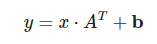

In [ ]:
import torch
import torch.nn as nn
device='cpu'
#device='cuda'

In [ ]:
class LinNet(nn.Module):
    def __init__(self):
        super(LinNet, self).__init__()
        # Define the model.
        self.layer1 = nn.Sequential(nn.Linear(in_features=2, out_features=2, bias=True))
        # Generate a fully connected linear neural network model, 1 layer, bias, linear activation function
        # returns: Trainable object
        #self.act = nn.LeakyReLU() #non-linear activation function
        #self.act = nn.ReLU() #non-linear activation function
    
    def forward(self, x):
        out = self.layer1(x)
        #out = self.act(out) #comment out if not desired
        return out

Data_preparation

In [ ]:
#input tensor, type torch tensor:
#Indices: batch, sample, features or signal dimension. Here: 1 batch, 3 samples, signal dimension 2:

#Training set:
X=torch.tensor([[1., 2.], [2., 1.],[1., 1.]]).view(1,3,2) #adding the first dimension for the batch
print("X.shape", X.shape)

#Target:
Y=torch.tensor([[1., 0.], [0., 1.],[0., 0.]]).view(1,3,2)
print("Y.shape", Y.shape)

#Validation set, to test generalization:
Xval=torch.tensor([[0.5, 1.0], [1., 0.5],[0.5, 0.5]]).view(1,3,2)
#Validation Target:
Yval=torch.tensor([[1., 0.], [0., 1.],[0., 0.]]).view(1,3,2)

X.shape torch.Size([1, 3, 2])
Y.shape torch.Size([1, 3, 2])


In [ ]:
#create network object:
model = LinNet().to(device)
loss_fn = nn.MSELoss()
print("Define loss function:", loss_fn)
#learning_rate = 1e-4
#optimizer = torch.optim.Adam(model.parameters())
optimizer = torch.optim.SGD(model.parameters(),lr=0.1)
print("Define optimizer:", optimizer)

Define loss function: MSELoss()
Define optimizer: SGD (
Parameter Group 0
    dampening: 0
    lr: 0.1
    momentum: 0
    nesterov: False
    weight_decay: 0
)


In [ ]:
for epoch in range(10000):
    Ypred=model(X) #the model produces prediction output
    loss=loss_fn(Ypred, Y) #prediction and target compared by loss
    if epoch%1000==0:
        print(epoch, loss.item()) #print current loss value
    optimizer.zero_grad() #optimizer sets previous gradients to zero
    loss.backward() #optimizer computes new gradients
    optimizer.step() #optimizer updates weights

0 1.9826375246047974
1000 0.0002927322348114103
2000 2.4277860575239174e-06
3000 2.016355260536784e-08
4000 1.6898364652018216e-10
5000 4.4426684553400264e-12
6000 4.4426684553400264e-12
7000 4.4426684553400264e-12
8000 4.4426684553400264e-12
9000 4.4426684553400264e-12


In [ ]:
Ypred=model(X) # Make Predictions based on the obtained weights
loss=loss_fn(Ypred, Y)
print("Loss on trainig set:", loss)
Yvalpred=model(Xval) # Make Predictions based on the obtained weights
loss=loss_fn(Yvalpred, Yval)
print("Loss on validation set:", loss)
weights = model.state_dict() #read obtained weights

Loss on trainig set: tensor(4.4427e-12, grad_fn=<MseLossBackward0>)
Loss on validation set: tensor(0.5000, grad_fn=<MseLossBackward0>)


The loss values: Only **4.6493e-12** on the **training se**t, but **0.5000** on the **validation** set Hence we have a **bad generalization**.

#*We add activation function and train the model and check the output*****

In [ ]:
class LinNet2(nn.Module):
    def __init__(self):
        super(LinNet2, self).__init__()
        # Define the model.
        self.layer1 = nn.Sequential(nn.Linear(in_features=2, out_features=2, bias=True))
        # Generate a fully connected linear neural network model, 1 layer, bias, linear activation function
        # returns: Trainable object
        self.act = nn.LeakyReLU() #non-linear activation function
        #self.act = nn.ReLU() #non-linear activation function
    
    def forward(self, x):
        out = self.layer1(x)
        out = self.act(out) #comment out if not desired
        return out

In [ ]:
#create network object:
model = LinNet2().to(device)
loss_fn = nn.MSELoss()
print("Define loss function:", loss_fn)
#learning_rate = 1e-4
#optimizer = torch.optim.Adam(model.parameters())
optimizer = torch.optim.SGD(model.parameters(),lr=0.1)
print("Define optimizer:", optimizer)

Define loss function: MSELoss()
Define optimizer: SGD (
Parameter Group 0
    dampening: 0
    lr: 0.1
    momentum: 0
    nesterov: False
    weight_decay: 0
)


In [ ]:
for epoch in range(10000):
    Ypred=model(X) #the model produces prediction output
    loss=loss_fn(Ypred, Y) #prediction and target compared by loss
    if epoch%1000==0:
        print(epoch, loss.item()) #print current loss value
    optimizer.zero_grad() #optimizer sets previous gradients to zero
    loss.backward() #optimizer computes new gradients
    optimizer.step() #optimizer updates weights

0 0.3932311236858368
1000 1.4584293239749968e-05
2000 1.4528071005770471e-05
3000 1.4480231584457215e-05
4000 1.4432474017667118e-05
5000 1.438479739590548e-05
6000 1.4337198081193492e-05
7000 1.4289677892520558e-05
8000 1.4242238648876082e-05
9000 1.4194876712281257e-05


In [ ]:
Ypred=model(X) # Make Predictions based on the obtained weights
loss=loss_fn(Ypred, Y)
print("Loss on trainig set:", loss)
Yvalpred=model(Xval) # Make Predictions based on the obtained weights
loss=loss_fn(Yvalpred, Yval)
print("Loss on validation set:", loss)
weights = model.state_dict() #read obtained weights

Loss on trainig set: tensor(1.4148e-05, grad_fn=<MseLossBackward0>)
Loss on validation set: tensor(0.1697, grad_fn=<MseLossBackward0>)


The loss values: Only **1.4148e-05** on the **training set**, but **0.1697** on the **validation set** Hence we have a better generalization than first model.

To see the effect of vanishing gradients on the optimization, we uncomment the line with "self.act=nn.ReLU()".
**This activation function has a constant "0" for negative values and hence a vanishing gradient for negative values.** 

In [ ]:
class LinNet3(nn.Module):
    def __init__(self):
        super(LinNet3, self).__init__()
        # Define the model.
        self.layer1 = nn.Sequential(nn.Linear(in_features=2, out_features=2, bias=True))
        # Generate a fully connected linear neural network model, 1 layer, bias, linear activation function
        # returns: Trainable object
        #self.act = nn.LeakyReLU() #non-linear activation function
        self.act = nn.ReLU() #non-linear activation function
    
    def forward(self, x):
        out = self.layer1(x)
        out = self.act(out) #comment out if not desired
        return out

In [ ]:
#create network object:
model = LinNet3().to(device)
loss_fn = nn.MSELoss()
print("Define loss function:", loss_fn)
#learning_rate = 1e-4
#optimizer = torch.optim.Adam(model.parameters())
optimizer = torch.optim.SGD(model.parameters(),lr=0.1)
print("Define optimizer:", optimizer)

Define loss function: MSELoss()
Define optimizer: SGD (
Parameter Group 0
    dampening: 0
    lr: 0.1
    momentum: 0
    nesterov: False
    weight_decay: 0
)


In [ ]:
for epoch in range(10000):
    Ypred=model(X) #the model produces prediction output
    loss=loss_fn(Ypred, Y) #prediction and target compared by loss
    if epoch%1000==0:
        print(epoch, loss.item()) #print current loss value
    optimizer.zero_grad() #optimizer sets previous gradients to zero
    loss.backward() #optimizer computes new gradients
    optimizer.step() #optimizer updates weights

0 0.4259568750858307
1000 0.3333333432674408
2000 0.3333333432674408
3000 0.3333333432674408
4000 0.3333333432674408
5000 0.3333333432674408
6000 0.3333333432674408
7000 0.3333333432674408
8000 0.3333333432674408
9000 0.3333333432674408


In [ ]:
Ypred=model(X) # Make Predictions based on the obtained weights
loss=loss_fn(Ypred, Y)
print("Loss on trainig set:", loss)
Yvalpred=model(Xval) # Make Predictions based on the obtained weights
loss=loss_fn(Yvalpred, Yval)
print("Loss on validation set:", loss)
weights = model.state_dict() #read obtained weights

Loss on trainig set: tensor(0.3333, grad_fn=<MseLossBackward0>)
Loss on validation set: tensor(0.3600, grad_fn=<MseLossBackward0>)


The **optimizer gets stuck at a loss value of 0.33** during training. This is cause by the vanishing gradient of the ReLU function in the negative input range.